In [169]:
import pandas as pd

In [170]:
alu_prices = pd.read_csv("../data/Aluminium Historical Data.csv")
gdp = pd.read_csv("../data/world gdp monthly.csv")
usd_index = pd.read_csv("../data/us-dollar-index-historical-chart.csv")
alu_production = pd.read_csv("../data/aluminuim_production.csv")
energy_index = pd.read_csv("../data/Global price of Energy index.csv")
usd_cad = pd.read_csv("../data/usd_canadian_dollar.csv")
usd_rupee = pd.read_csv("../data/usd_indian_rupee.csv")
usd_ruble = pd.read_csv("../data/usd_russian_ruble.csv")
usd_yuan = pd.read_csv("../data/CNY=X.csv")
gas = pd.read_csv("./Data/NaturalGas.csv")
oil = pd.read_csv("./Data/IR14200.csv")
zinc = pd.read_csv("../data/data with all factorst1.0.csv")

In [171]:
nickel = zinc[["Unnamed: 0", "nickel_price"]]
zinc = zinc[["Unnamed: 0", "zinc_price"]]


In [172]:
alu_production = alu_production[["Date", "Africa", "North America", "South America", "Asia (ex China)", "Western & Central Europe", "Russia & Eastern Europe", "Oceania", "Gulf Cooperation Council", "China (Estimated)", "Estimated Unreported to IAI"]]
alu_production["Total"] = alu_production.sum(axis="columns", numeric_only=True)
alu_production["Date"] = pd.to_datetime(alu_production["Date"], format="%d/%m/%Y")
alu_production.rename(columns={"Total":"Production_total"}, inplace=True)
energy_index["DATE"] = pd.to_datetime(energy_index["DATE"], format="%Y-%m-%d")
energy_index.rename(columns={"DATE":"Date", "PNRGINDEXM":"Energy_index"}, inplace=True)
usd_rupee["Date"] = pd.to_datetime(usd_rupee["Date"], format="%Y-%m-%d")
usd_cad["Date"] = pd.to_datetime(usd_cad["Date"], format="%Y-%m-%d")
usd_ruble["Date"] = pd.to_datetime(usd_ruble["Date"], format="%Y-%m-%d")
usd_yuan["Date"] = pd.to_datetime(usd_yuan["Date"], format="%Y-%m-%d")
usd_rupee.rename(columns={"Open":"Open_usd_rupee"}, inplace=True)
usd_ruble.rename(columns={"Open":"Open_usd_ruble"}, inplace=True)
usd_yuan.rename(columns={"Open":"Open_usd_yuan"}, inplace=True)
usd_cad.rename(columns={"Open":"Open_usd_cad"}, inplace=True)

In [173]:

zinc.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
nickel.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
zinc["Date"] = pd.to_datetime(zinc["Date"])
nickel["Date"] = pd.to_datetime(nickel["Date"])

In [174]:
oil["DATE"] = pd.to_datetime(oil["DATE"])
oil.rename(columns={"DATE":"Date", "IR14200":"Oil"}, inplace=True)
gas["DATE"] = pd.to_datetime(gas["DATE"])
gas.rename(columns={"DATE":"Date", "PNGASEUUSDM":"Natural Gas"}, inplace=True)

In [175]:
gdp["Date"] = pd.to_datetime(gdp["Date"])

In [176]:
usd_index["Date"] = pd.to_datetime(usd_index["Date"], format="%d/%m/%Y")

In [177]:
alu_prices["Date"] = pd.to_datetime(alu_prices["Date"]) 

In [178]:
alu_prices.Price = alu_prices.Price.apply(lambda x: x.replace(",", ""))
alu_prices["Price"] = alu_prices["Price"].astype("float")

In [179]:
test_df = pd.merge(left=alu_prices[["Date", "Price"]], right=gdp, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=alu_production, on="Date", how="left")
test_df = pd.merge(left=test_df, right=energy_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_ruble[["Date", "Open_usd_ruble"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_rupee[["Date", "Open_usd_rupee"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_cad[["Date", "Open_usd_cad"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_yuan[["Date", "Open_usd_yuan"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=nickel, on="Date", how="left")
test_df = pd.merge(left=test_df, right=zinc, on="Date", how="left")
test_df = pd.merge(left=test_df, right=oil, on="Date", how="left")
test_df = pd.merge(left=test_df, right=gas, on="Date", how="left")

In [180]:
test_df = test_df.sort_values("Date")

In [181]:
test_df = test_df.fillna(method="ffill")

In [182]:
test_df.dropna(inplace=True)

In [183]:
import pandas as pd
from sklearn import linear_model

In [184]:
from mlxtend.preprocessing import minmax_scaling
test = minmax_scaling(test_df[["Price", "Energy_index", "USD_index", "Production_total"]], columns=["Price", "Energy_index", "USD_index", "Production_total"])
X = test[["Energy_index", "USD_index", "Production_total"]]
y = test["Price"]


In [185]:
X = test_df[["Energy_index", "USD_index", "Production_total"]]
y = test_df["Price"]

In [186]:
X = test_df[["GDP", "USD_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "zinc_price", "nickel_price"]]
y = test_df["Price"]

In [188]:
test_df.rename(columns={"Price": "Aluminium Price", "USD_index": "USD Index", "Production_total": "Global Aluminium Production", "Open_usd_rupee":"USD Rupee Ex.", "Open_usd_cad": "USD CAD Ex.", "Open_usd_ruble": "USD Ruble Ex.", "Open_usd_yuan": "USD Yuan Ex.", "zinc_price":"Zinc Price", "nickel_price":"Nickel Price", "Energy_index":"Energy Index"}, inplace=True)

In [221]:
## This is a test to investigate if aluminium price trend features can improve the models performance

test_df["Aluminium_Price_Trend"] = test_df["Aluminium Price"].shift(90)
test_df["Aluminium_Price_Trend"] = test_df["Aluminium_Price_Trend"].rolling(5).mean()
test_df

,Date,Aluminium Price,GDP,USD Index,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,...,Energy Index,USD Ruble Ex.,USD Rupee Ex.,USD CAD Ex.,USD Yuan Ex.,Nickel Price,Zinc Price,Oil,Natural Gas,Aluminium_Price_Trend
1832,2015-08-25,1556.00,101.202050,95.544,142.0,374.0,103.0,251.0,317.0,322.0,...,122.938901,70.834999,66.806999,1.32840,6.3944,12050.0,2032.0,129.0,6.680000,NaN
1831,2015-08-26,1529.75,101.202050,95.544,142.0,374.0,103.0,251.0,317.0,322.0,...,122.938901,69.426003,66.282997,1.33440,6.4029,12050.0,2032.0,129.0,6.680000,NaN
1830,2015-08-27,1558.50,101.202050,95.544,142.0,374.0,103.0,251.0,317.0,322.0,...,122.938901,68.434998,66.056000,1.33000,6.4010,12050.0,2032.0,129.0,6.680000,NaN
1829,2015-08-28,1601.75,101.202050,95.544,142.0,374.0,103.0,251.0,317.0,322.0,...,122.938901,65.305000,66.055000,1.31900,6.3953,12050.0,2032.0,129.0,6.680000,NaN
1828,2015-09-01,1599.50,101.202050,97.660,140.0,366.0,104.0,256.0,308.0,315.0,...,109.025266,62.648701,66.349998,1.31420,6.3664,9940.0,1826.0,122.7,6.490000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-11-16,2412.00,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,330.149586,60.465000,81.071404,1.32735,7.0430,22950.0,2752.0,216.3,55.179127,2406.7
3,2022-11-17,2391.00,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,330.149586,60.740002,81.495300,1.33355,7.0872,22950.0,2752.0,216.3,55.179127,2397.4
2,2022-11-18,2430.00,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,330.149586,60.365002,81.524902,1.33214,7.1562,22950.0,2752.0,216.3,55.179127,2374.5
1,2022-11-21,2384.50,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,330.149586,60.035000,81.519897,1.33769,7.1189,22950.0,2752.0,216.3,55.179127,2356.0


In [234]:
test_df.dropna(inplace=True)
X_train = test_df[test_df.columns[2:-1]].iloc[:-90]
y_train = test_df["Aluminium Price"].iloc[:-90]
X_test = test_df[test_df.columns[2:-1]].iloc[-90:]
y_test = test_df["Aluminium Price"].iloc[-90:]

In [229]:
X_train.columns

Index(['GDP', 'USD Index', 'Africa', 'North America', 'South America',
       'Asia (ex China)', 'Western & Central Europe',
       'Russia & Eastern Europe', 'Oceania', 'Gulf Cooperation Council',
       'China (Estimated)', 'Estimated Unreported to IAI',
       'Global Aluminium Production', 'Energy Index', 'USD Ruble Ex.',
       'USD Rupee Ex.', 'USD CAD Ex.', 'USD Yuan Ex.', 'Nickel Price',
       'Zinc Price', 'Oil', 'Natural Gas', 'Aluminium_Price_Trend'],
      dtype='object')

In [235]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)



LinearRegression()

In [ ]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 3774.735278699789
Coefficients: 
 [-4.12670126e+00 -5.61715844e-01 -2.69293675e+00 -3.64061889e+00
 -3.36542419e-01  3.96819767e+00  4.81988425e+00 -7.79187593e+00
 -3.05011127e+00  3.51119048e+00 -1.57045950e-01  5.33612343e+00
 -3.37353848e-02  3.74923435e-01  1.02946734e+01 -2.92795057e+01
 -1.60456592e+03  1.33724503e+02 -1.68644619e-02  5.68603250e-02
  1.01478576e+01 -8.71471168e-01]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'\n\nplt.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")\nplt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")\nplt.ylabel("Aluminium Price in USD")\nplt.xlabel("Time")\nplt.legend(loc="upper left")\n\nticker_spacing = 1\nplt.set_xticks\nplt.xticks(np.arange(min(test_df["Date"].iloc[-90:],), max(test_df["Date"].iloc[-90:],)+1, 1.0))'

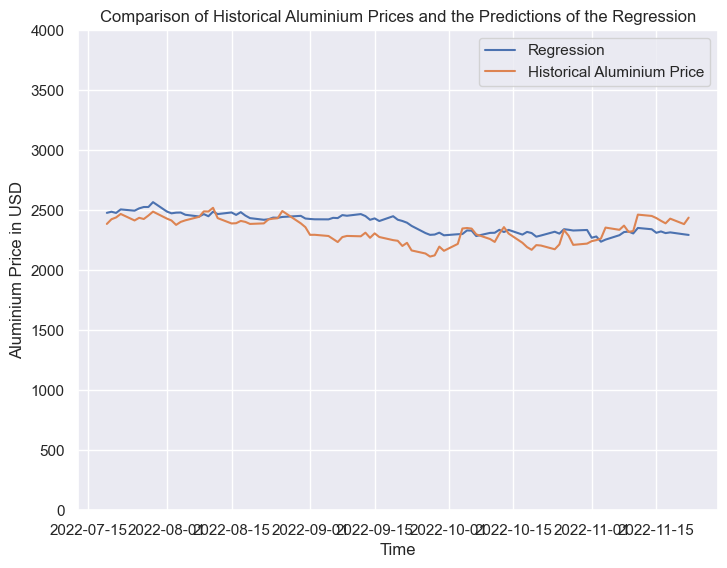

In [236]:
import numpy as np
import matplotlib.ticker as ticker
predictions = regr.predict(X_test.to_numpy())

sns.set_theme(style="darkgrid")

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(test_df["Date"].iloc[-90:], y_test, label = "Historical Aluminium Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
#plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
#ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Aluminium Prices and the Predictions of the Regression")
plt.ylim([0, 4000])
plt.plot()
"""

plt.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")
plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
plt.ylabel("Aluminium Price in USD")
plt.xlabel("Time")
plt.legend(loc="upper left")

ticker_spacing = 1
plt.set_xticks
plt.xticks(np.arange(min(test_df["Date"].iloc[-90:],), max(test_df["Date"].iloc[-90:],)+1, 1.0))"""



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [237]:
predictions = regr.predict(X_test.to_numpy())
print(mean_absolute_error(y_test, predictions))
print(mean_squared_error(y_test, predictions))

87.23011312796567
10695.51542016956


d:\Uni\3. Semester\Projektseminar\tkseminar\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
test_df["Aluminium Price"].iloc[-90:].mean()

2331.6055555555554

In [238]:
mean_absolute_error(y_test, predictions) / y_test.mean()

0.037412036920276254

In [ ]:
test_df.columns

Index(['Date', 'Price', 'GDP', 'USD_index', 'Africa', 'North America',
       'South America', 'Asia (ex China)', 'Western & Central Europe',
       'Russia & Eastern Europe', 'Oceania', 'Gulf Cooperation Council',
       'China (Estimated)', 'Estimated Unreported to IAI', 'Production_total',
       'Energy_index', 'Open_usd_ruble', 'Open_usd_rupee', 'Open_usd_cad',
       'Open_usd_yuan', 'nickel_price', 'zinc_price', 'Oil', 'Natural Gas'],
      dtype='object')

In [ ]:
test_df.rename(columns={"Price": "Aluminium Price", "USD_index": "USD Index", "Production_total": "Global Aluminium Production", "Open_usd_rupee":"USD Rupee Ex.", "Open_usd_cad": "USD CAD Ex.", "Open_usd_ruble": "USD Ruble Ex.", "Open_usd_yuan": "USD Yuan Ex.", "zinc_price":"Zinc Price", "nickel_price":"Nickel Price", "Energy_index":"Energy Index"}, inplace=True)

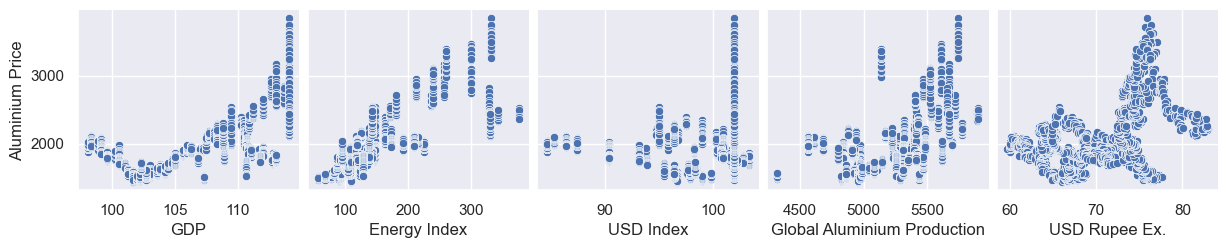

In [ ]:
sns.pairplot(data=test_df, y_vars=["Aluminium Price"], x_vars=["GDP", "Energy Index", "USD Index", "Global Aluminium Production", "USD Rupee Ex."])

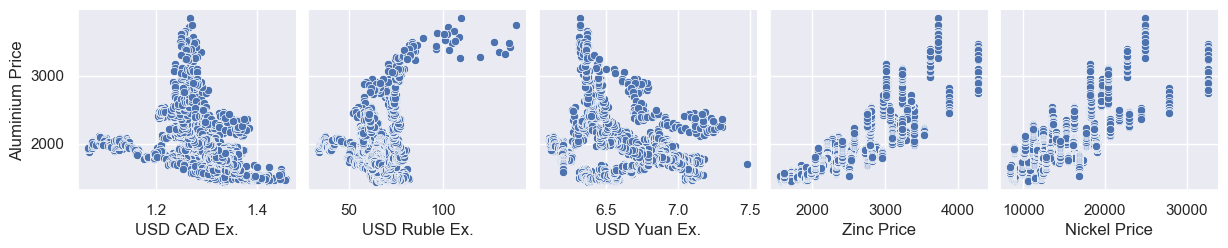

In [ ]:
sns.pairplot(data=test_df, y_vars=["Aluminium Price"], x_vars=["USD CAD Ex.", "USD Ruble Ex.", "USD Yuan Ex.", "Zinc Price", "Nickel Price"])

In [ ]:
test_df.iloc[:50]

,Date,Aluminium Price,GDP,USD Index,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,...,Global Aluminium Production,Energy Index,USD Ruble Ex.,USD Rupee Ex.,USD CAD Ex.,USD Yuan Ex.,Nickel Price,Zinc Price,Oil,Natural Gas
2124,2014-07-01,1884.50,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,33.857201,60.053001,1.06709,6.1938,18970.0,2195.0,150.5,9.40
2123,2014-07-02,1926.00,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.332199,60.028000,1.06350,6.1900,18970.0,2195.0,150.5,9.40
2122,2014-07-03,1936.00,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.273201,59.685001,1.06675,6.2006,18970.0,2195.0,150.5,9.40
2121,2014-07-04,1921.50,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.169201,59.733002,1.06370,6.2020,18970.0,2195.0,150.5,9.40
2120,2014-07-07,1919.50,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.450199,59.717999,1.06520,6.1941,18970.0,2195.0,150.5,9.40
2119,2014-07-08,1938.00,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.406200,59.882999,1.06820,6.1938,18970.0,2195.0,150.5,9.40
2118,2014-07-09,1937.75,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.195202,59.748001,1.06718,6.1915,18970.0,2195.0,150.5,9.40
2117,2014-07-10,1922.25,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,33.647202,59.682999,1.06480,6.1854,18970.0,2195.0,150.5,9.40
2116,2014-07-11,1939.00,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,33.937199,60.188000,1.06480,6.1928,18970.0,2195.0,150.5,9.40
2115,2014-07-14,1938.50,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.211201,60.088001,1.07270,6.1936,18970.0,2195.0,150.5,9.40


In [ ]:
test_df["Energy_index_trend"] = test_df["Energy_index"].rolling(180).mean() - test_df["Energy_index"].iloc[90:]
test_df["Production_total_trend"] = test_df["Production_total"].rolling(180).mean() - test_df["Production_total"].iloc[90:]
test_df["GDP_trend"] = test_df["GDP"].rolling(90).mean() - test_df["GDP"].iloc[90:]
test_df["USD_index_trend"] = test_df["USD_index"].rolling(180).mean() - test_df["USD_index"].iloc[90:]


KeyError: 'Energy_index'

In [ ]:
test_df[["Price", "Energy_index", "Energy_index_trend"]].iloc[-50:]


,Price,Energy_index,Energy_index_trend
49,2270.5,330.149586,0.024960
48,2307.5,330.149586,0.025907
47,2277.0,330.149586,0.026852
46,2251.0,330.149586,0.027795
45,2245.5,330.149586,0.028736
44,2202.5,330.149586,0.029675
43,2228.5,330.149586,0.030613
42,2165.0,330.149586,0.031549
41,2139.5,330.149586,0.032483
40,2114.0,330.149586,0.033415


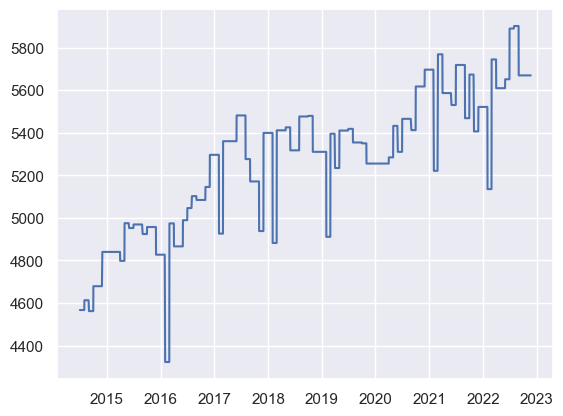

In [ ]:
plt.plot(test_df.Date, test_df.Production_total)


In [ ]:
test_df[["Date", "Global Aluminium Production"]]

,Date,Global Aluminium Production
2124,2014-07-01,4567.0
2123,2014-07-02,4567.0
2122,2014-07-03,4567.0
2121,2014-07-04,4567.0
2120,2014-07-07,4567.0
...,...,...
4,2022-11-16,5669.0
3,2022-11-17,5669.0
2,2022-11-18,5669.0
1,2022-11-21,5669.0


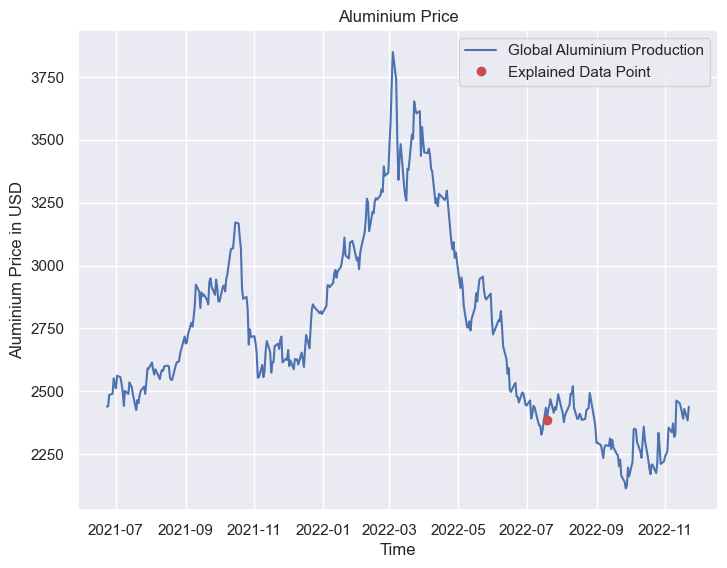

In [ ]:
import numpy as np
import matplotlib.ticker as ticker

sns.set_theme(style="darkgrid")

fig = plt.figure()
ax1 = ax1 = fig.add_axes((1,1,1,1))
ax1.plot(test_df["Date"].iloc[-360:], test_df["Aluminium Price"].iloc[-360:], label="Global Aluminium Production")
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
ax1.set_title("Aluminium Price")
#plt.axvline(test_df["Date"].iloc[-90], color='red', alpha=1, label="Trend Window")
plt.plot(test_df["Date"].iloc[-90], test_df["Aluminium Price"].iloc[-90], "ro", label="Explained Data Point")
plt.legend()

In [ ]:
test_df["Glo"]

In [ ]:
import numpy as np
import matplotlib.ticker as ticker


sns.set_theme(style="darkgrid")

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(test_df["Date"].iloc[-90:], y_test, label = "Historical Aluminium Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
#plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
#ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Aluminium Prices and the Predictions of the Regression")
plt.ylim([0, 4000])
plt.plot()

In [ ]:
test_df

,Date,Aluminium Price,GDP,USD Index,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,...,Global Aluminium Production,Energy Index,USD Ruble Ex.,USD Rupee Ex.,USD CAD Ex.,USD Yuan Ex.,Nickel Price,Zinc Price,Oil,Natural Gas
2124,2014-07-01,1884.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,33.857201,60.053001,1.06709,6.1938,18970.0,2195.0,150.5,9.400000
2123,2014-07-02,1926.0,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.332199,60.028000,1.06350,6.1900,18970.0,2195.0,150.5,9.400000
2122,2014-07-03,1936.0,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.273201,59.685001,1.06675,6.2006,18970.0,2195.0,150.5,9.400000
2121,2014-07-04,1921.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.169201,59.733002,1.06370,6.2020,18970.0,2195.0,150.5,9.400000
2120,2014-07-07,1919.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.450199,59.717999,1.06520,6.1941,18970.0,2195.0,150.5,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-11-16,2412.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.465000,81.071404,1.32735,7.0430,22950.0,2752.0,216.3,55.179127
3,2022-11-17,2391.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.740002,81.495300,1.33355,7.0872,22950.0,2752.0,216.3,55.179127
2,2022-11-18,2430.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.365002,81.524902,1.33214,7.1562,22950.0,2752.0,216.3,55.179127
1,2022-11-21,2384.5,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.035000,81.519897,1.33769,7.1189,22950.0,2752.0,216.3,55.179127
